<a href="https://colab.research.google.com/github/AtifQureshi110/CNN/blob/main/cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/BERT/Transformers/Selceted for interview/CNN/data_dir/archive.zip", "r")
zip_ref.extractall("/content")
zip_ref.close()

-
TensorFlow is a deep learning framework developed by Google, offering low-level operations for building neural networks. Keras is a high-level API for building neural networks, known for its simplicity and user-friendliness. In TensorFlow 2.x, Keras has become the default API, providing a seamless integration with TensorFlow's capabilities. Together, they offer a powerful and flexible platform for developing and training deep learning models.

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [3]:
# generators it divides the data into batches. and it ervery useful in large data
# these are in the numpy array from 0 to 255
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',# creating the dataset.
    labels='inferred', #  It assigns labels based on the directory structure, converting them to integer labels for training.
    label_mode='int', # label will be integer such as 0, 1
    batch_size=32,
    image_size=(256, 256) # all the images will be in (256, 256, 3)

)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [4]:
# normalize
# convert the pixel values in 0 to 1
def process(image, label):
  image =tf.cast(image/255., tf.float32) #The tf.float32 data type ensures that pixel values are represented as 32-bit floating point numbers
  return image,label
train_ds =train_ds.map(process)
validation_ds =validation_ds.map(process)

In [5]:
# creating the model
model = Sequential()
# padding='valid' no padding will be addd in image
# as image comes it will have the size of 256, 256,32.
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
# the feature map will be  254, 254, 3 and the trainable parameter will be 3*3*3+1 ==> 28 * by no of filters 32 =896
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
# now the image size will be 127, 127, 32

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
# the feature map will be  125, 125, 64 and the trainable parameter will be 3*3*32+1 ==> 288 * by no of filters 64 =18, 432
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
# now the image size will be 62, 62, 64

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
# the feature map will be  60, 60, 128 and the trainable parameter will be 3*3*64+1 ==> 577 * by no of filters 128 = 73,728
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
# now the image size will be 30, 30, 128

model.add(Flatten())
# now convert the image matrix into 1D array and the item in the flatten layer will be
# 30*30*128 = 115200

#fully connected layer01
model.add(Dense(128, activation='relu'))
# 115200* 128+128
# the trainable parameter will be 14,745,728

#fully connected layer02
model.add(Dense(64, activation='relu'))
# 128 neurons in previous layer×64 neurons in current layer+64 bias terms=8256

model.add(Dense(1, activation='sigmoid'))
# trainable parameters will be 64+1 = 65

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# in the training data we have 20000 image and in generator we define 32 batches so the total total batches will be 20000/32 = 625

In [8]:
history = model.fit(train_ds, epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 77s 111ms/step - loss: 0.6048 - accuracy: 0.6605 - val_loss: 0.5237 - val_accuracy: 0.7374
Epoch 2/10
625/625 [==============================] - 59s 94ms/step - loss: 0.4544 - accuracy: 0.7877 - val_loss: 0.4257 - val_accuracy: 0.8034
Epoch 3/10
625/625 [==============================] - 56s 89ms/step - loss: 0.3513 - accuracy: 0.8433 - val_loss: 0.4845 - val_accuracy: 0.8016
Epoch 4/10
625/625 [==============================] - 52s 83ms/step - loss: 0.2172 - accuracy: 0.9093 - val_loss: 0.5548 - val_accuracy: 0.8070
Epoch 5/10
625/625 [==============================] - 55s 87ms/step - loss: 0.1202 - accuracy: 0.9531 - val_loss: 0.8882 - val_accuracy: 0.7938
Epoch 6/10
625/625 [==============================] - 52s 83ms/step - loss: 0.0828 - accuracy: 0.9702 - val_loss: 1.1109 - val_accuracy: 0.7926
Epoch 7/10
625/625 [==============================] - 56s 89ms/step - loss: 0.0618 - accuracy: 0.9779 - val_loss: 0.9894 - val_accuracy

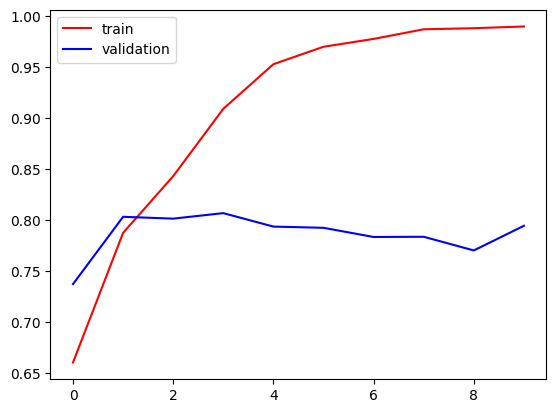

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()
# the gap show the overfitting.

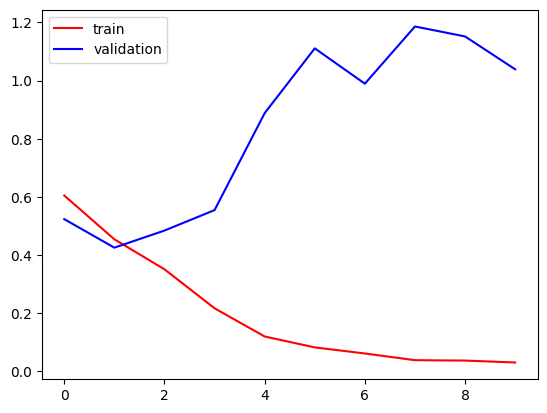

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting
# Add more data
# Data Augmentation -> next
# L1/L2 Regularizer
# Dropout -> done
# Batch Norm -> done
# Reduce complexity

In [21]:
# create CNN model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
"""Batch normalization applies a transformation that maintains
the mean output close to 0 and the output standard deviation
close to 1. Importantly, batch normalization works differently during
training and during inference."""
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
# Dropout is a regularization technique used during training to prevent overfitting
# the parameter 0.1 indicates that 10% of the input units will be randomly dropped out (set to zero) during each training epoch.
# reducing the reliance of the model on specific features and improves its generalization ability
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(train_ds, epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 67s 100ms/step - loss: 1.0654 - accuracy: 0.6026 - val_loss: 0.5573 - val_accuracy: 0.7202
Epoch 2/10
625/625 [==============================] - 66s 106ms/step - loss: 0.5273 - accuracy: 0.7377 - val_loss: 0.6307 - val_accuracy: 0.7102
Epoch 3/10
625/625 [==============================] - 66s 106ms/step - loss: 0.4386 - accuracy: 0.8006 - val_loss: 0.5290 - val_accuracy: 0.7710
Epoch 4/10
625/625 [==============================] - 66s 104ms/step - loss: 0.3609 - accuracy: 0.8397 - val_loss: 0.4822 - val_accuracy: 0.7666
Epoch 5/10
625/625 [==============================] - 63s 100ms/step - loss: 0.3339 - accuracy: 0.8584 - val_loss: 0.4457 - val_accuracy: 0.8122
Epoch 6/10
625/625 [==============================] - 65s 104ms/step - loss: 0.2306 - accuracy: 0.9043 - val_loss: 0.5315 - val_accuracy: 0.8236
Epoch 7/10
625/625 [==============================] - 64s 101ms/step - loss: 0.1599 - accuracy: 0.9382 - val_loss: 0.5986 - val_ac

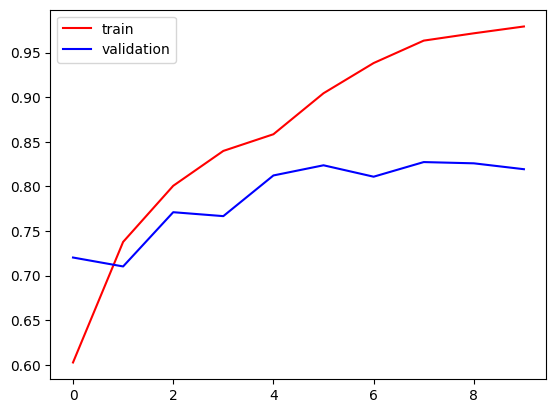

In [25]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

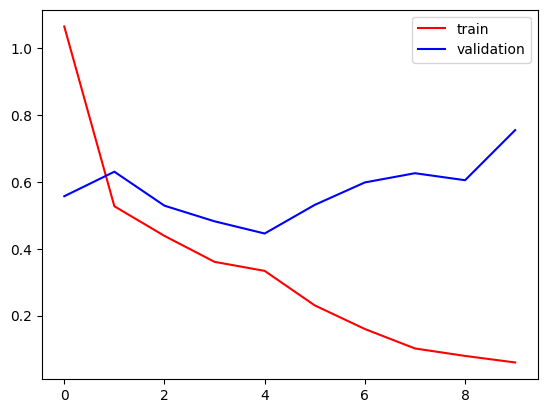

In [26]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [105]:
import cv2

In [124]:
test_img = cv2.imread('/content/dog.jpg')

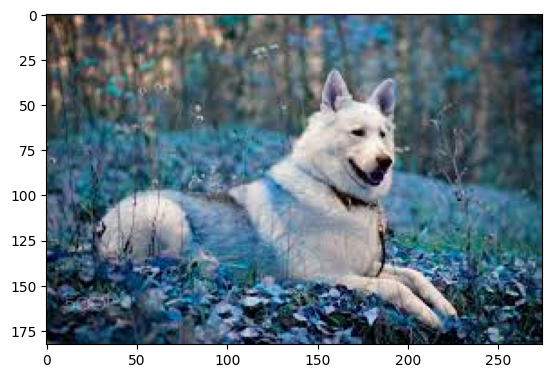

In [125]:
plt.imshow(test_img)

In [126]:
test_img.shape

(183, 275, 3)

In [127]:


# Resize the image to the target shape (256, 256)
resized_img = cv2.resize(test_img, (256, 256))

# Reshape the resized image into the desired shape (1, 256, 256, 3)
test_input = resized_img.reshape((1, 256, 256, 3))

In [128]:
model.predict(test_input)

1/1 [==============================] - 0s 35ms/step


array([[1.]], dtype=float32)